# Importamos las librerías

In [1]:
import numpy as np
from sklearn.manifold import TSNE

from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

# Cargamos un modelo

In [3]:
w2v_sg = Word2Vec.load('../../data/w2v_sg_d300_mc5_w5.pkl')

In [4]:
w2v_sg.wv.most_similar('brexit')

[('duro', 0.6139558553695679),
 ('comunes', 0.5841501951217651),
 ('incertidumbre', 0.5307192802429199),
 ('tensiones', 0.5284384489059448),
 ('reino', 0.527982771396637),
 ('esperanza', 0.5233896970748901),
 ('bolsas', 0.5199801921844482),
 ('acerca', 0.5006659030914307),
 ('johnson', 0.4975699782371521),
 ('ue', 0.4950684905052185)]

# Creamos _clusters_ de palabras con las más similares a unas dadas

In [5]:
keys = ['comida', 'comer', 'agua', 'elecciones', 'brexit']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_sg.wv.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(w2v_sg.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [6]:
print(word_clusters)

[['comer', 'masticar', 'calorías', 'dientes', 'boca', 'cuándo', 'digestión', 'higiene', 'difícil', 'piezas'], ['comida', 'combatir', 'calorías', 'masticar', 'sarcopenia', 'digestión', 'edad', 'masa', 'apenas', 'muscular'], ['acondicionado', 'calefacción', 'gas', 'laguna', 'aire', 'agricultura', 'ganadería', 'tradicionales', 'dispositivo', 'murcia'], ['generales', 'forzar', 'cs', 'moción', 'johnson', 'próximas', 'apoyos', 'derecho', 'investidura', 'sumar'], ['duro', 'comunes', 'incertidumbre', 'tensiones', 'reino', 'esperanza', 'bolsas', 'acerca', 'johnson', 'ue']]


# Reducimos dimensionalidad a 2D para poder representar

In [7]:
tsne_model_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)

In [8]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape

In [9]:
embeddings_2d = np.array(tsne_model_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


# Visualización

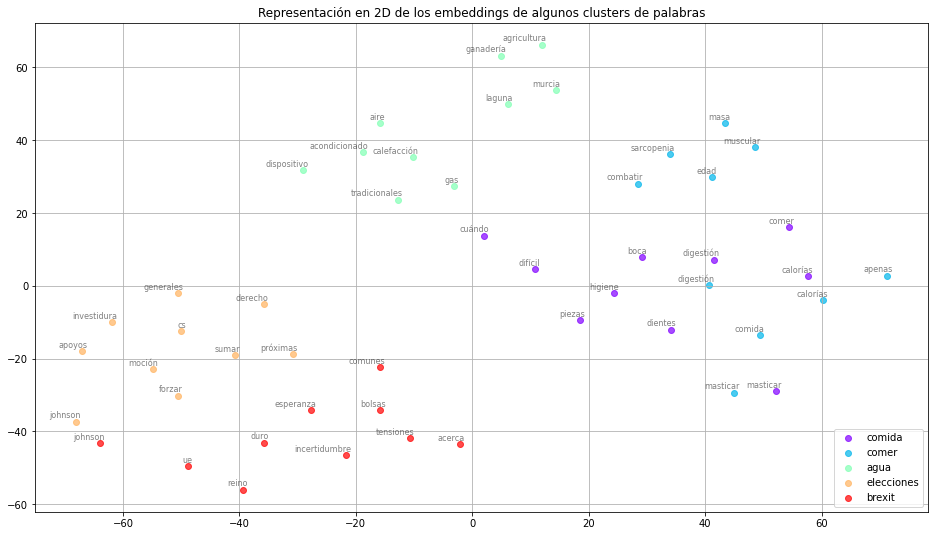

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline


def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=[color], alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.title('Representación en 2D de los embeddings de algunos clusters de palabras')
    # plt.savefig("f/г.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words(keys, embeddings_2d, word_clusters)

## Embedding projector online

Permite cargar un fichero TSV con los word embeddings pre-calculados y representarlos en una representación interactiva en 3D. 

La reducción de dimensionalidad puede realizarse mediante UMAP, t-SNE o PCA.

Además, permite cargar los vectores con metadata como, por ejemplo, variables categóricas, que permitirán visualizar los topics / clusters en el espacio de 3D.

https://projector.tensorflow.org

<img src=https://i.ytimg.com/vi/y2rEqxzqOkM/maxresdefault.jpg>